# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import requests
from io import StringIO

dataset_url = "https://raw.githubusercontent.com/hbedros/data622-assignment2/refs/heads/main/data/dataset.csv"
response = requests.get(dataset_url, verify=False)  # Disables SSL verification
data = StringIO(response.text)
dataset = pd.read_csv(data)

print(dataset.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


We will inspect the dataset to understand its structure better. This includes checking the types of data, the number of rows and columns, and identifying any missing values.

In [ ]:
print(dataset.info())
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

As we've observed, there are missing values in the Teacher_Quality, Parental_Education_Level, and Distance_from_Home columns. To ensure our dataset is suitable for comprehensive analysis and to avoid bias in our models, we need to address these missing values. Imputation is a practical approach to handle this situation. We will:

Impute missing values in Teacher_Quality with the most frequent category (mode) since this variable is categorical.
Set missing entries in Parental_Education_Level to "Unknown" to acknowledge the absence of data without assuming any specific level of education.
Treat missing values in Distance_from_Home similarly by classifying them as "Unknown"

In [ ]:
mode_teacher_quality = dataset['Teacher_Quality'].mode()[0]

dataset['Teacher_Quality'].fillna(mode_teacher_quality, inplace=True)
dataset['Parental_Education_Level'].fillna('Unknown', inplace=True)
dataset['Distance_from_Home'].fillna('Unknown', inplace=True)

print(dataset.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


Now that we have addressed the missing values, we can now move on to a more detailed exploration of the dataset.

We will create a table to show the frequency of each categorical variable in the dataset. These tables will help us understand the distribution of variables such as Parental Involvement, Access to Resources, Extracurricular Activities, Motivation Level, and Internet Access.

Frequency Distribution for Parental_Involvement:
  Parental_Involvement  Frequency
0               Medium       3362
1                 High       1908
2                  Low       1337


Frequency Distribution for Access_to_Resources:
  Access_to_Resources  Frequency
0              Medium       3319
1                High       1975
2                 Low       1313


Frequency Distribution for Extracurricular_Activities:
  Extracurricular_Activities  Frequency
0                        Yes       3938
1                         No       2669


Frequency Distribution for Motivation_Level:
  Motivation_Level  Frequency
0           Medium       3351
1              Low       1937
2             High       1319


Frequency Distribution for Internet_Access:
  Internet_Access  Frequency
0             Yes       6108
1              No        499




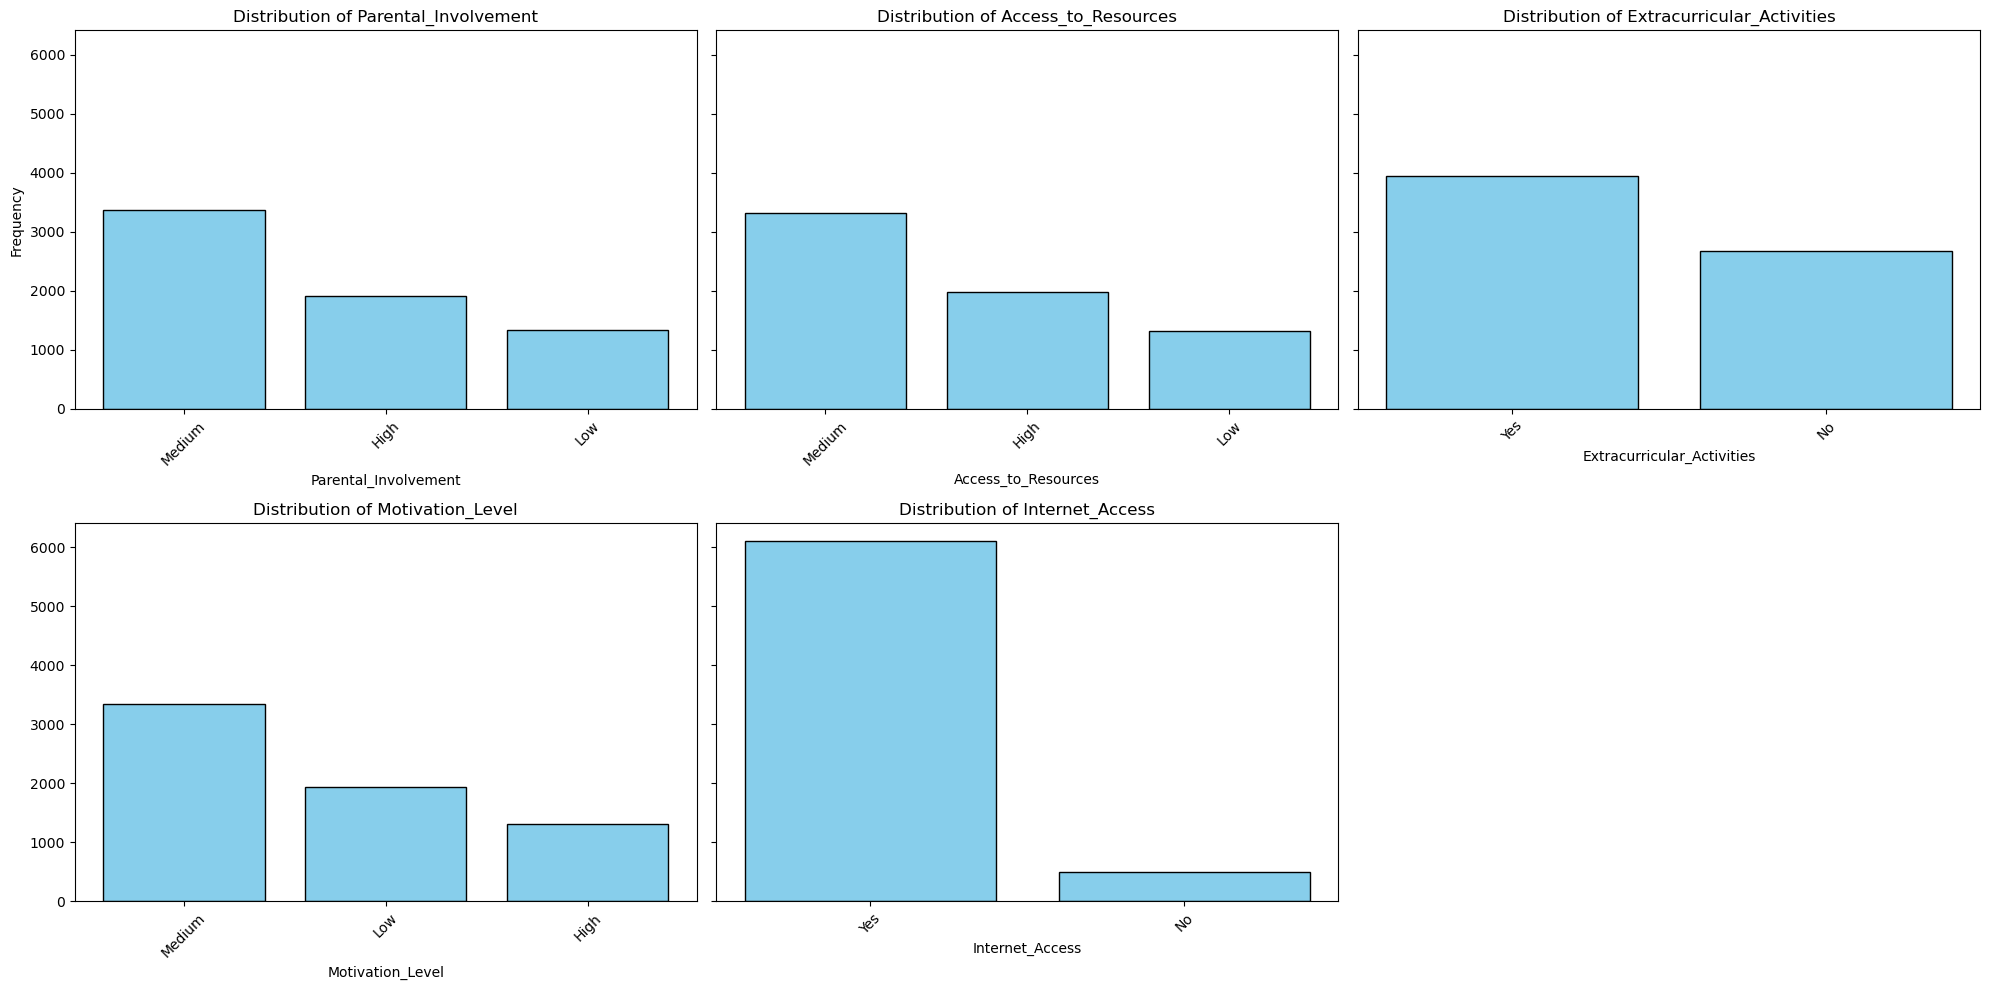

In [ ]:
cat_vars = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access']
frequency_tables = {}

for var in cat_vars:
    frequency = dataset[var].value_counts().reset_index()
    frequency.columns = [var, 'Frequency']
    frequency_tables[var] = frequency
    
    print(f"Frequency Distribution for {var}:")
    print(frequency)
    print("\n")

n_rows = 2
n_cols = (len(cat_vars) + 1) // n_rows  # Calculate number of columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharey=True)

for i, var in enumerate(cat_vars):
    row, col = divmod(i, n_cols)
    frequency = frequency_tables[var]
    axes[row, col].bar(frequency[var], frequency['Frequency'], color='skyblue', edgecolor='black')
    axes[row, col].set_title(f"Distribution of {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].tick_params(axis='x', rotation=45)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

axes[0, 0].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


Parental Involvement: Most students have medium or high parental involvement, which generally supports better academic performance, though a notable number still experience low involvement.

Access to Resources: Access to educational resources is mostly medium or high, but there's still a significant minority with low access, potentially hindering their learning opportunities.

Extracurricular Activities: More than half of the students engage in extracurricular activities, enhancing their educational experience, though many do not participate.

Motivation Level: The most common motivation level is medium, with a substantial number of students feeling low motivation, which could impact their educational achievements.

Internet Access: Almost all students have internet access, crucial for modern education, though a small fraction does not, which could limit their learning resources.

Next we will calculate the descriptive statistics to get a better understanding of central tendencies, dispersion, and shape of the dataset’s numerical distributions. This step is important for identifying any outliers, anomalies, or patterns in the data.

In [ ]:
numerical_stats = dataset[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']].describe()
print(numerical_stats)

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

Hours Studied: Students study around 20 hours on average, with most spending 16 to 24 hours. Some study as little as 1 hour, while others reach 44.

Attendance: Attendance is generally high, averaging 80%, with a range from 60% to perfect attendance.

Sleep Hours: Students get about 7 hours of sleep on average, mostly between 6 and 8 hours, which is fairly typical.

Previous Scores: Past scores average 75, but there’s a lot of variation, with scores ranging from 50 to 100.

Tutoring Sessions: Most students attend 1 or 2 tutoring sessions, though a few attend up to 8, while others have none.

Physical Activity: Physical activity averages around 3, with most students in the middle range, from 0 to 6.

Exam Score: The average exam score is 67, with scores fairly close to this range but some students scoring as high as 101.

Next, we will create histograms for each numerical variable to visualize their distributions. This helps in understanding the spread of data points, skewness, and identifying potential outliers.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

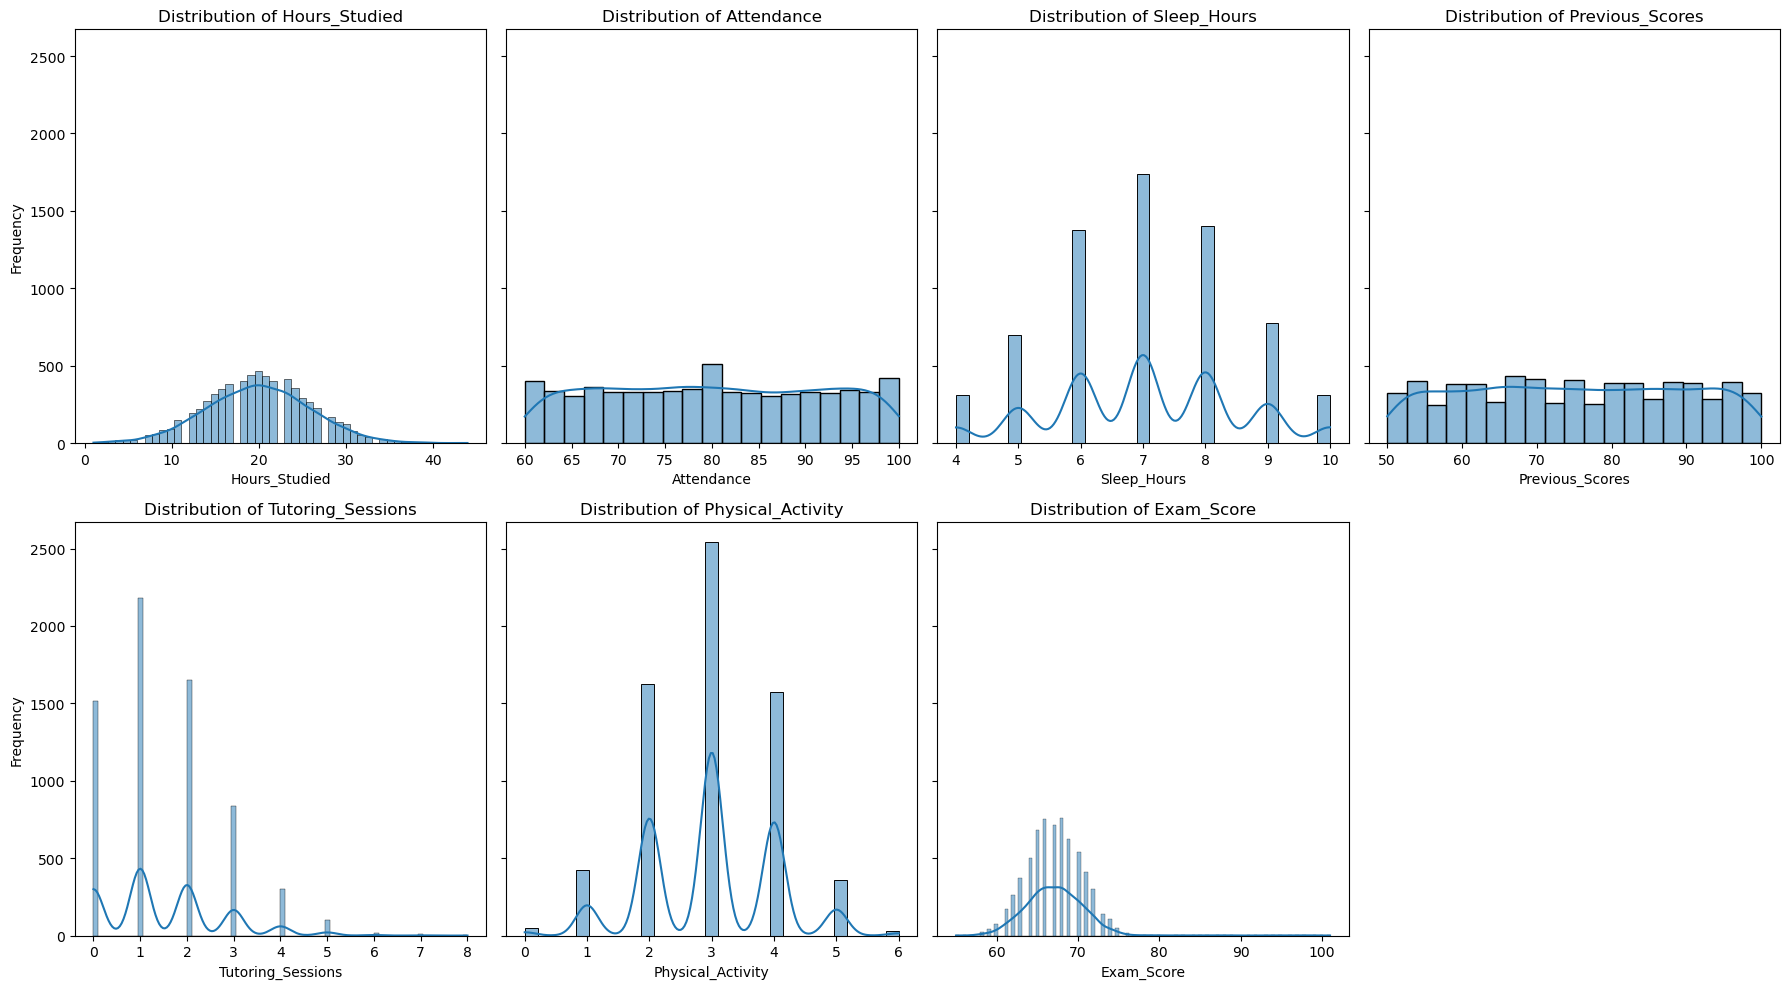

In [ ]:
numerical_vars = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

fig, axes = plt.subplots(2, 4, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    sns.histplot(dataset[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Hide the last empty subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


Hours Studied: The distribution is roughly symmetrical with a bell shape, suggesting study hours are normally distributed around an average.

Attendance: The distribution is generally uniform, showing attendance is fairly consistent among students, though there are slight variations.

Sleep Hours: The distribution is irregular but shows prominent peaks around 7 hours, indicating this is the most common sleep duration among students.

Previous Scores: This distribution is relatively flat with no strong single peak, showing that students' previous scores are fairly evenly spread across the range.
Tutoring Sessions: The distribution is multimodal, with sharp peaks at 1, 2, and 3 sessions, indicating these are common tutoring frequencies. Very few students have more than 4 sessions.

Physical Activity: This distribution has several peaks, suggesting that certain levels of physical activity are more common, particularly around 2 and 3 sessions.

Exam Score: The distribution is bell-shaped with a central peak around the mean score, showing that most students score near the average, with fewer scoring at the extremes

Next, we will create box plots to visualize the spread and identify any potential outliers in each numerical variable. Box plots will allow us to see the typical range of values, the central tendency, and any extreme values that may stand out in each variable.

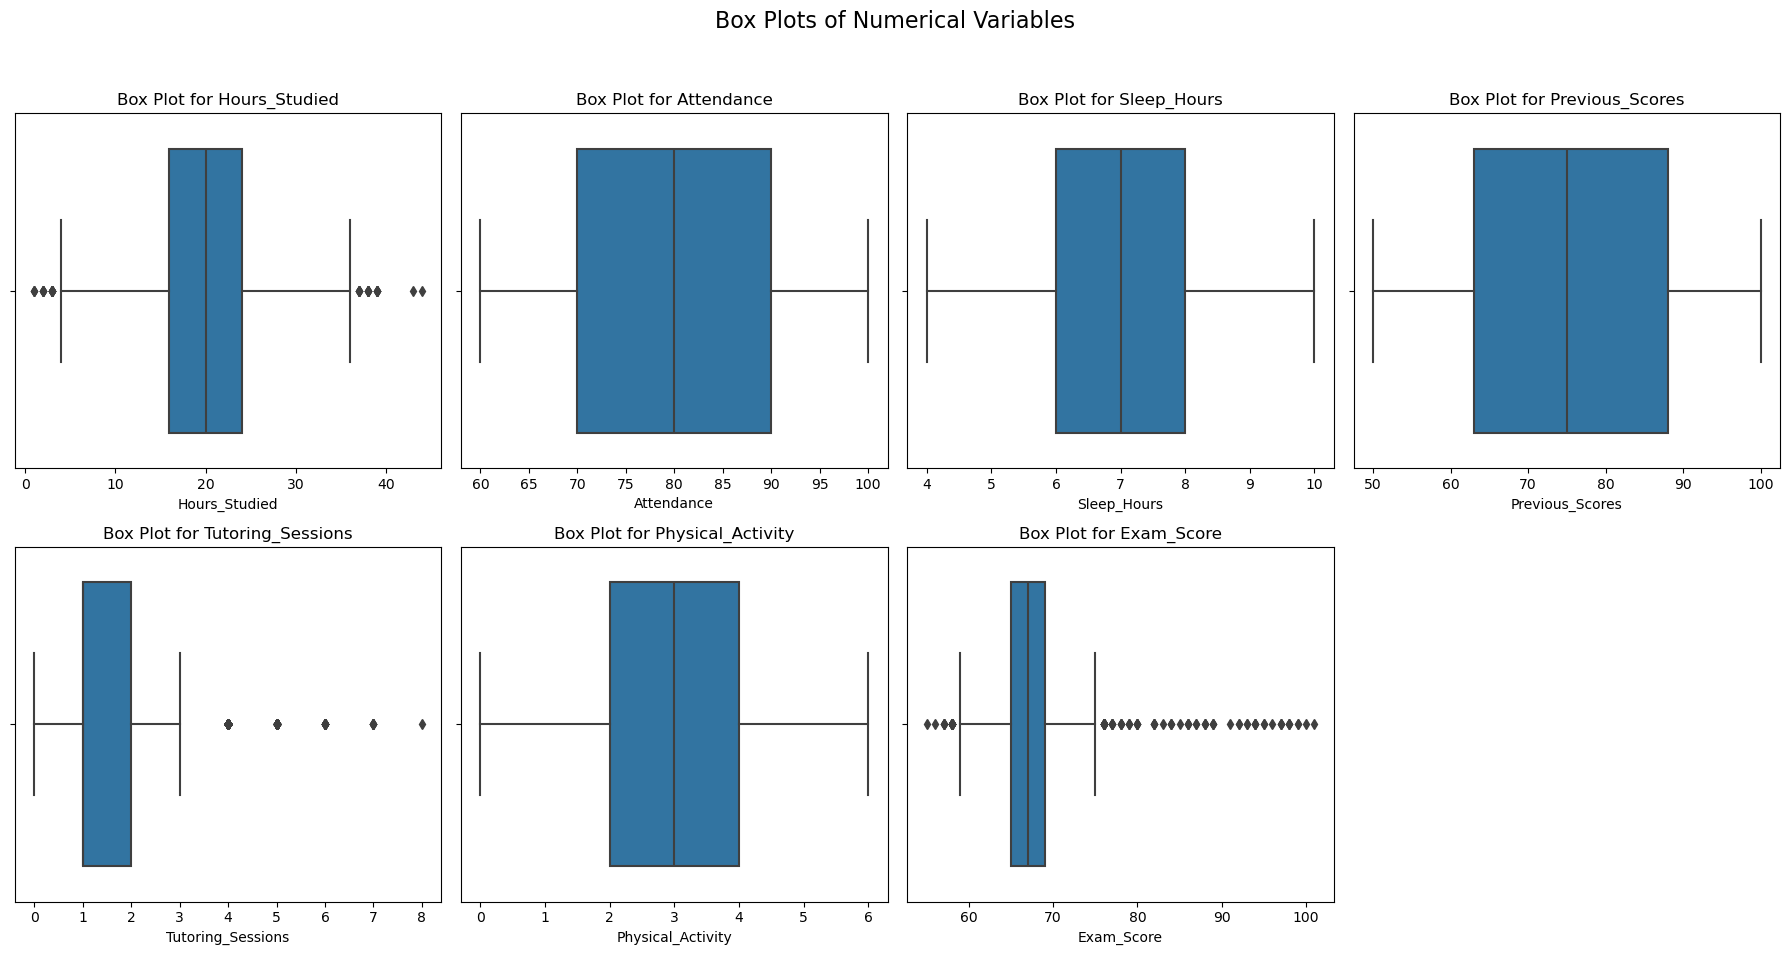

In [ ]:
numerical_vars = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))  # Creating a 2x4 grid
fig.suptitle("Box Plots of Numerical Variables", fontsize=16)

axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    sns.boxplot(x=dataset[var], ax=axes[i])
    axes[i].set_title(f'Box Plot for {var}')
    axes[i].set_xlabel(var)

axes[-1].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


The box plots show that Hours_Studied, Tutoring_Sessions, and Exam_Score have outliers. In Hours_Studied, some students study much more or less than others. Tutoring_Sessions has outliers on the higher side, meaning a few students attend many more sessions. For Exam_Score, there are outliers at the high end, indicating some students score much higher than their peers. The other variables don't show significant outliers, suggesting more consistent results among those students.

Next, we will calculate and visualize the correlation matrix for the numerical variables. This matrix will help us identify any strong relationships between variables, which could provide insights into factors that influence Exam_Score.

                   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.009908     0.010977         0.024846   
Attendance             -0.009908    1.000000    -0.015918        -0.020186   
Sleep_Hours             0.010977   -0.015918     1.000000        -0.021750   
Previous_Scores         0.024846   -0.020186    -0.021750         1.000000   
Tutoring_Sessions      -0.014282    0.014324    -0.012216        -0.013122   
Physical_Activity       0.004624   -0.022435    -0.000378        -0.011274   
Exam_Score              0.445455    0.581072    -0.017022         0.175079   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.014282           0.004624    0.445455  
Attendance                  0.014324          -0.022435    0.581072  
Sleep_Hours                -0.012216          -0.000378   -0.017022  
Previous_Scores            -0.013122          -0.011274    0.175079  
Tutoring_Sessions        

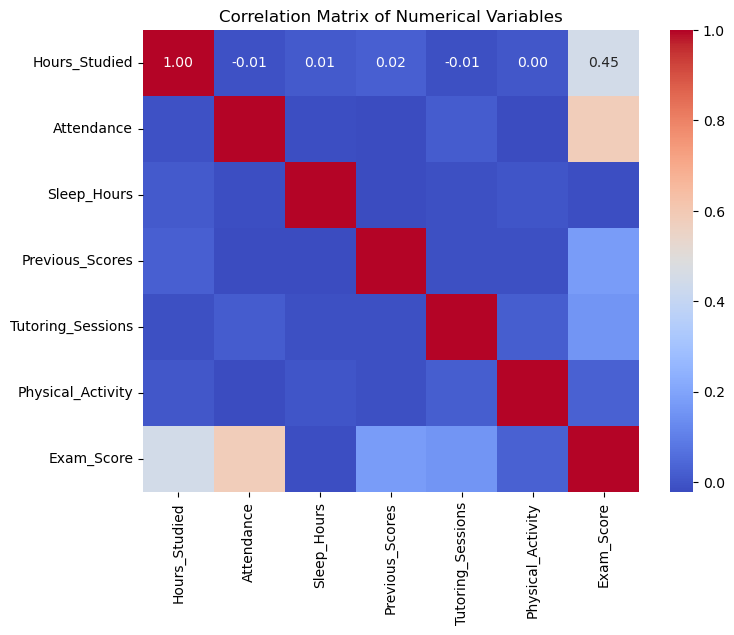

In [ ]:
numeric_dataset = dataset.select_dtypes(include=[float, int])

correlation_matrix = numeric_dataset.corr(method='pearson')

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


Exam Score shows a moderate positive correlation with Attendance (0.58) and Hours Studied (0.45). This suggests that higher attendance and study hours are associated with better exam scores.
Previous Scores has a weak positive correlation with Exam Score (0.18), indicating a slight influence of past performance on current scores.
Tutoring Sessions has a weak positive correlation with Exam Score (0.16), showing a minor association.
Other variables, such as Sleep Hours (-0.02), Physical Activity (0.03), and their correlations with Exam Score, are near zero, suggesting little to no relationship with exam performance.

We will create scatter plots for each pair of numerical variables (Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, and Exam_Score) to identify any potential relationships.

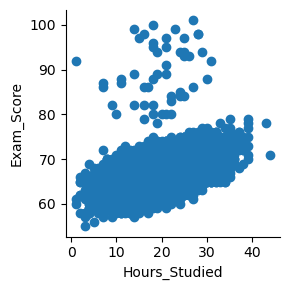

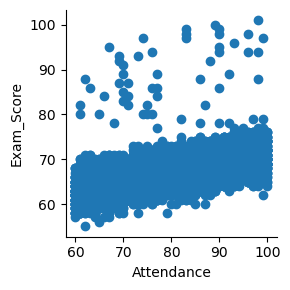

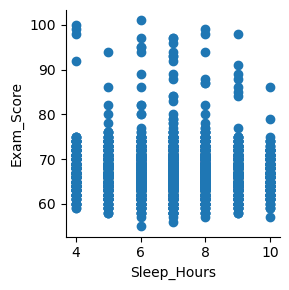

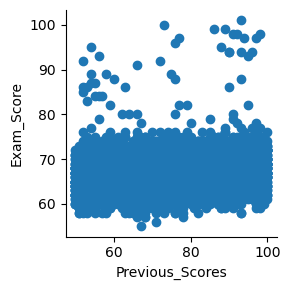

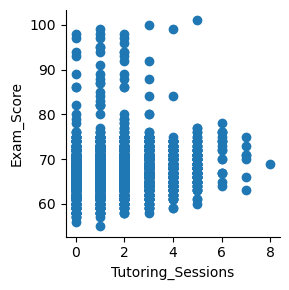

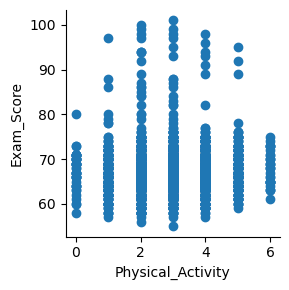

In [ ]:
g1 = sns.FacetGrid(dataset)
g1.map(plt.scatter, 'Hours_Studied', 'Exam_Score')

g2 = sns.FacetGrid(dataset)
g2.map(plt.scatter, 'Attendance', 'Exam_Score')

g3 = sns.FacetGrid(dataset)
g3.map(plt.scatter, 'Sleep_Hours', 'Exam_Score')

g4 = sns.FacetGrid(dataset)
g4.map(plt.scatter, 'Previous_Scores', 'Exam_Score')

g5 = sns.FacetGrid(dataset)
g5.map(plt.scatter, 'Tutoring_Sessions', 'Exam_Score')

g6 = sns.FacetGrid(dataset)
g6.map(plt.scatter, 'Physical_Activity', 'Exam_Score')

plt.show()

The scatter plots show that Hours Studied and Attendance have positive relationships with Exam Score, meaning students who study more and have higher attendance tend to score better. This aligns with the correlation matrix, which also indicated these positive associations. On the other hand, Sleep Hours, Previous Scores, Tutoring Sessions, and Physical Activity show little to no correlation with Exam Score, which is consistent with the weak relationships observed in the correlation matrix.

## Further Exploratory Data Analysis (EDA)

We will expand our analysis by examining the relationships between categorical and numerical variables in the dataset. We will compare **Teacher Quality vs. School Type** and **Family Income vs. Parental Involvement** to identify associations. Additionally, we will analyze how **Teacher Quality** and **Parental Involvement** influence **Exam Scores**. A **Cramer's V heatmap** will be used to visualize categorical relationships, followed by a full **correlation heatmap** that compares both categorical and numerical variables (such as **Hours Studied**, **Attendance**, and **Exam Scores**) to explore their interdependencies.

In [ ]:
# Function for Cramer's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

## 1. Teacher Quality vs. School Type Analysis

Crosstab: Teacher_Quality vs. School_Type
School_Type      Private  Public
Teacher_Quality                 
High                 600    1347
Low                  194     463
Medium              1215    2788

Chi-Squared Test Results: p-value = 0.8187854209225479
There is no significant association between Teacher_Quality and School_Type.



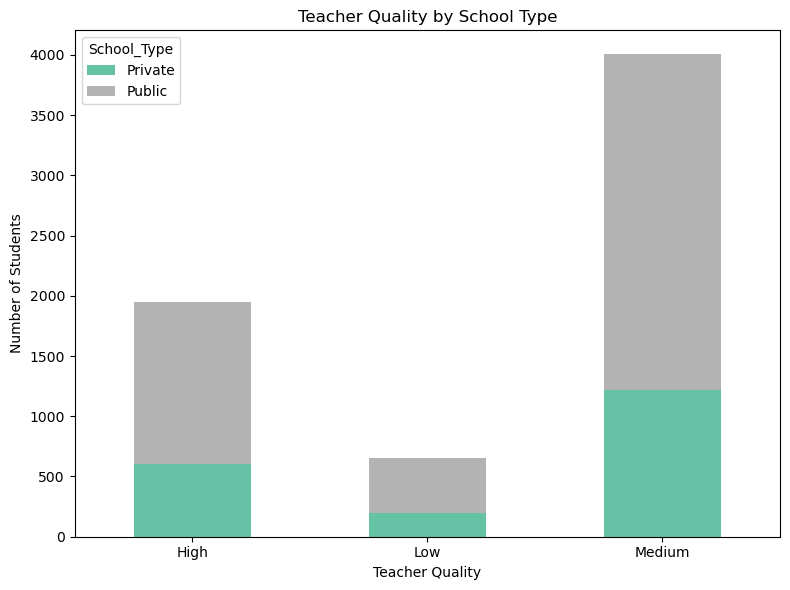

In [ ]:
def analyze_categorical_relationship(var1, var2, data, plot_title, xlabel, ylabel, colors):
    crosstab = pd.crosstab(data[var1], data[var2])
    print(f"Crosstab: {var1} vs. {var2}")
    print(crosstab)
    
    chi2, p, _, _ = stats.chi2_contingency(crosstab)
    print(f"\nChi-Squared Test Results: p-value = {p}")
    
    if p < 0.05:
        print(f"There is a significant association between {var1} and {var2}.\n")
    else:
        print(f"There is no significant association between {var1} and {var2}.\n")
    
    crosstab.plot(kind='bar', stacked=True, figsize=(8,6), colormap=colors)
    plt.title(plot_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

analyze_categorical_relationship('Teacher_Quality', 'School_Type', dataset,
                                 'Teacher Quality by School Type', 'Teacher Quality', 
                                 'Number of Students', 'Set2')

## 2. Family Income vs. Parental Involvement

Crosstab: Family_Income vs. Parental_Involvement
Parental_Involvement  High  Low  Medium
Family_Income                          
High                   369  251     649
Low                    768  571    1333
Medium                 771  515    1380

Chi-Squared Test Results: p-value = 0.41712007138121165
There is no significant association between Family_Income and Parental_Involvement.



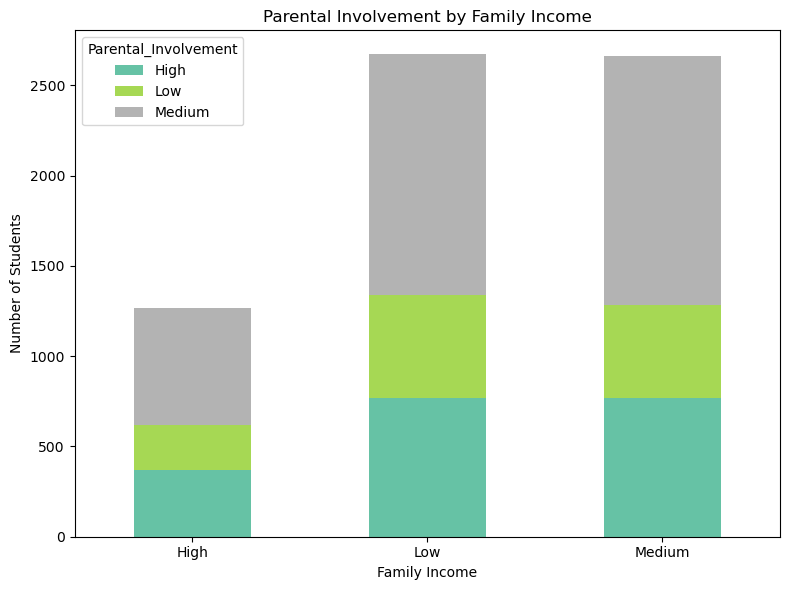

In [ ]:
analyze_categorical_relationship('Family_Income', 'Parental_Involvement', dataset,
                                 'Parental Involvement by Family Income', 'Family Income', 
                                 'Number of Students', 'Set2')

## 3. Exam Score vs. Teacher Quality & Parental Involvement

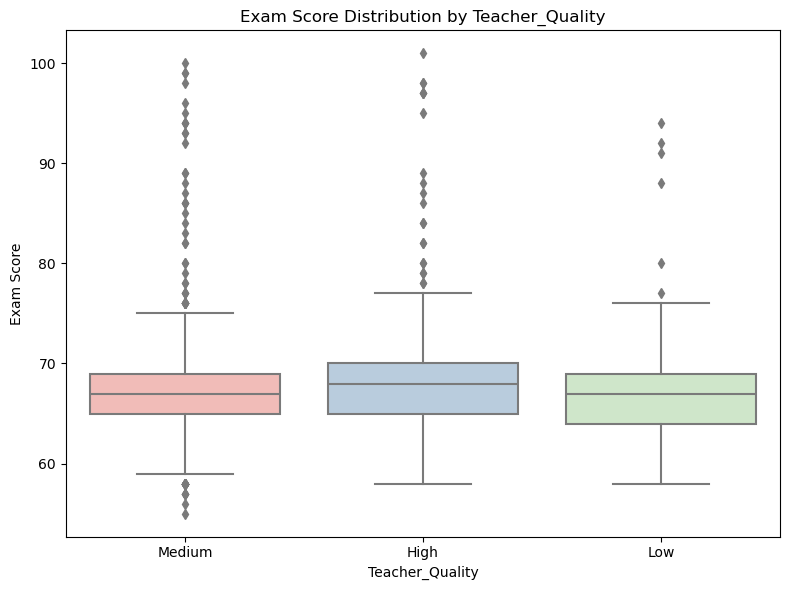

ANOVA Test for Teacher_Quality on Exam Score: F-statistic = 20.11486626123462, p-value = 1.953102198679977e-09
We see differences in Exam Scores across Teacher_Quality levels.



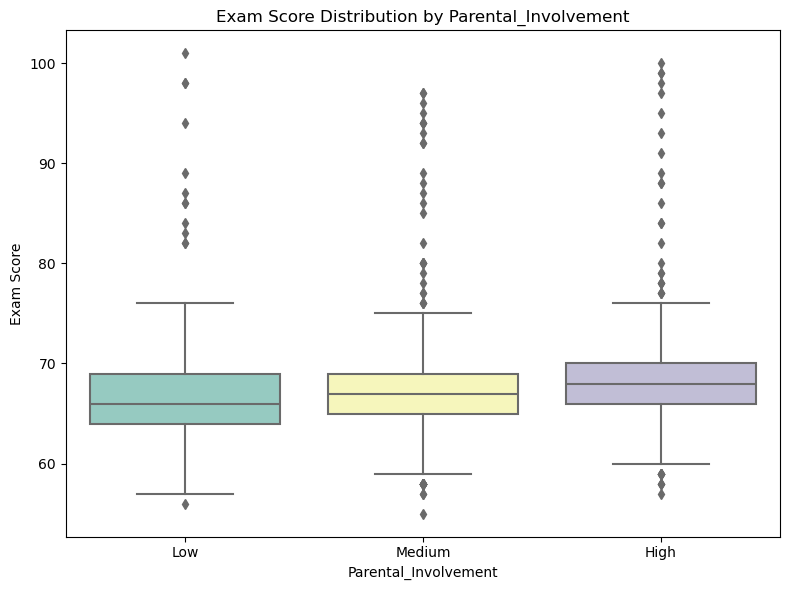

ANOVA Test for Parental_Involvement on Exam Score: F-statistic = 84.48765484606227, p-value = 5.875479153325444e-37
We see differences in Exam Scores across Parental_Involvement levels.



In [ ]:
# Now we examine exam scores against categorical variables
def anova_test_plot(var, data, palette, title):
    plt.figure(figsize=(8,6))
    sns.boxplot(x=var, y='Exam_Score', data=data, palette=palette)
    plt.title(f'Exam Score Distribution by {var}')
    plt.xlabel(var)
    plt.ylabel('Exam Score')
    plt.tight_layout()
    plt.show()

    groups = [data['Exam_Score'][data[var] == level] for level in data[var].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    print(f"ANOVA Test for {var} on Exam Score: F-statistic = {f_val}, p-value = {p_val}")
    
    if p_val < 0.05:
        print(f"We see differences in Exam Scores across {var} levels.\n")
    else:
        print(f"No significant differences in Exam Scores across {var} levels.\n")

anova_test_plot('Teacher_Quality', dataset, 'Pastel1', 'Exam Score Distribution by Teacher Quality')
anova_test_plot('Parental_Involvement', dataset, 'Set3', 'Exam Score Distribution by Parental Involvement')


Both **Teacher Quality** and **Parental Involvement** have statistically significant effects on exam scores, but **Parental Involvement** shows a much stronger influence. With an F-statistic of **84.49** compared to **20.11** for Teacher Quality, the results suggest that **Parental Involvement** plays a more substantial role in determining students' academic performance.

## 4. Heatmap for Categorical Variables

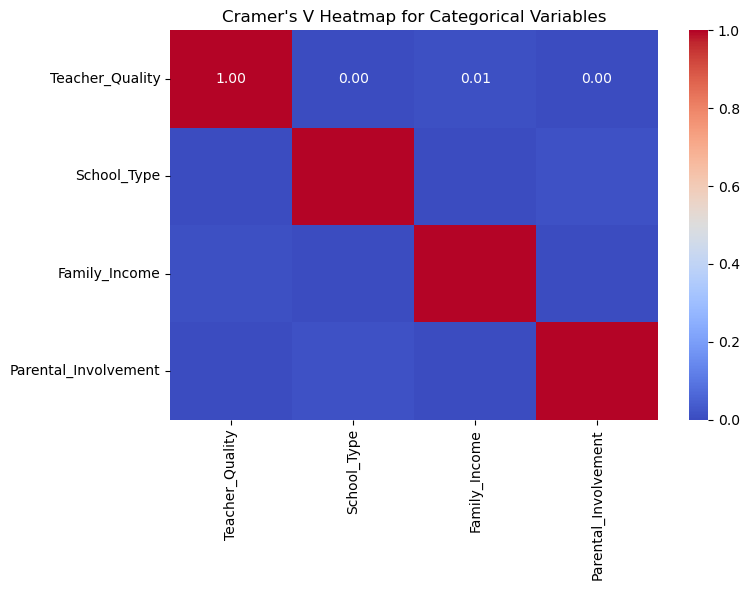

In [ ]:
def cramers_v_heatmap(vars, data, title):
    cramers_v_matrix = pd.DataFrame(index=vars, columns=vars)
    
    for var1 in vars:
        for var2 in vars:
            if var1 == var2:
                cramers_v_matrix.loc[var1, var2] = 1.0
            else:
                cramers_v_matrix.loc[var1, var2] = cramers_v(data[var1], data[var2])
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.tight_layout()
    plt.show()

categorical_vars = ['Teacher_Quality', 'School_Type', 'Family_Income', 'Parental_Involvement']
cramers_v_heatmap(categorical_vars, dataset, "Cramer's V Heatmap for Categorical Variables")

The heatmap shows very weak or no significant associations between the categorical variables. **Teacher Quality** and **School Type** show no meaningful relationship, and **Family Income** has little impact on **Parental Involvement**. Overall, the relationships between these variables are negligible, suggesting they are largely independent of each other.

## 5. Mixed Correlation Heatmap: Categorical & Numerical Variables

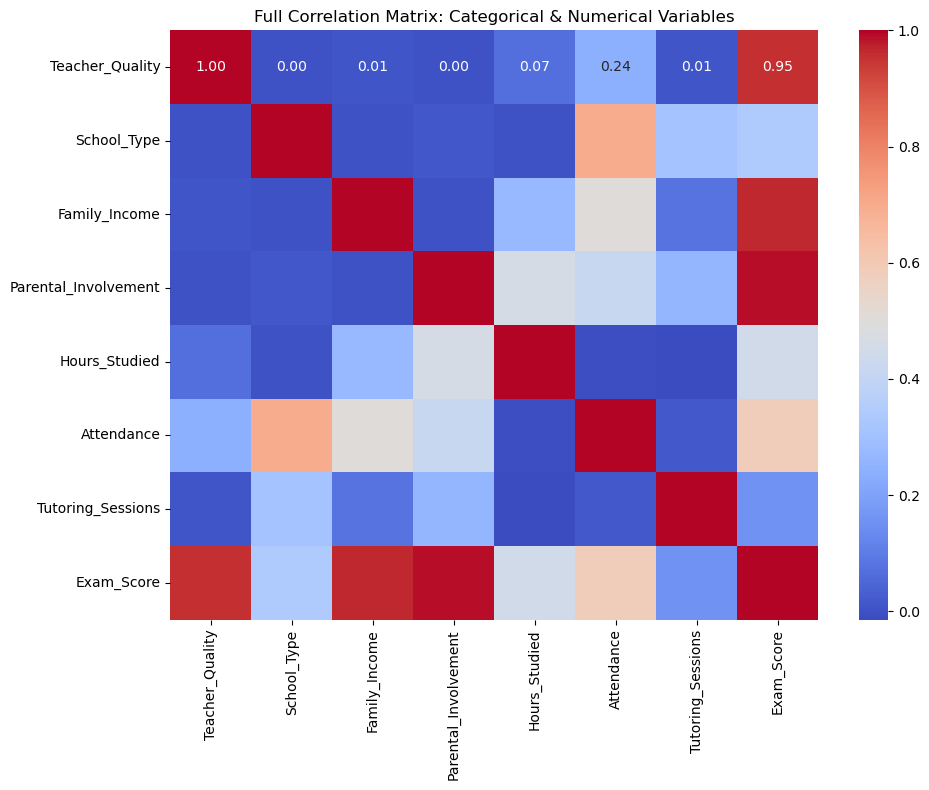

In [ ]:
def mixed_correlation_heatmap(categorical_vars, numerical_vars, data):
    combined_vars = categorical_vars + numerical_vars
    correlation_matrix_full = pd.DataFrame(index=combined_vars, columns=combined_vars)
    
    for var1 in categorical_vars:
        for var2 in categorical_vars:
            if var1 == var2:
                correlation_matrix_full.loc[var1, var2] = 1.0
            else:
                correlation_matrix_full.loc[var1, var2] = cramers_v(data[var1], data[var2])

    # Numerical-numerical: Pearson correlation
    for var1 in numerical_vars:
        for var2 in numerical_vars:
            correlation_matrix_full.loc[var1, var2] = data[[var1, var2]].corr().iloc[0, 1]

    # Categorical-numerical: ANOVA F-test transformed into correlation-like values
    for cat_var in categorical_vars:
        for num_var in numerical_vars:
            groups = [data[num_var][data[cat_var] == level] for level in data[cat_var].unique()]
            f_val, _ = stats.f_oneway(*groups)
            correlation_matrix_full.loc[cat_var, num_var] = correlation_matrix_full.loc[num_var, cat_var] = f_val / (1 + f_val)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_full.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Full Correlation Matrix: Categorical & Numerical Variables')
    plt.tight_layout()
    plt.show()

numerical_vars = ['Hours_Studied', 'Attendance', 'Tutoring_Sessions', 'Exam_Score']
mixed_correlation_heatmap(categorical_vars, numerical_vars, dataset)


### Key Insights:

- **Parental Involvement** and **Family Income** have the strongest positive correlations with **Exam Scores**, meaning students with more involved parents and higher family incomes tend to perform better.
- **Teacher Quality** is also highly correlated with **Exam Scores**, showing that better teacher quality leads to better student performance.
- **Attendance** and **Hours Studied** both positively influence exam scores, but their impact is not as strong as parental involvement or family income.
- **Tutoring Sessions** have a weaker positive effect, suggesting that while tutoring helps, it is not as impactful as the other factors.

Overall, **Parental Involvement**, **Family Income**, and **Teacher Quality** are the most important factors in predicting student success.


## Random Forest 

This is the section with the Random Forest models. I will also fix this intro later. This is Julia btw.

Mean Absolute Error: 1.0774281391830558
Mean Squared Error: 4.640233888048411
R² Score: 0.6717219599055038


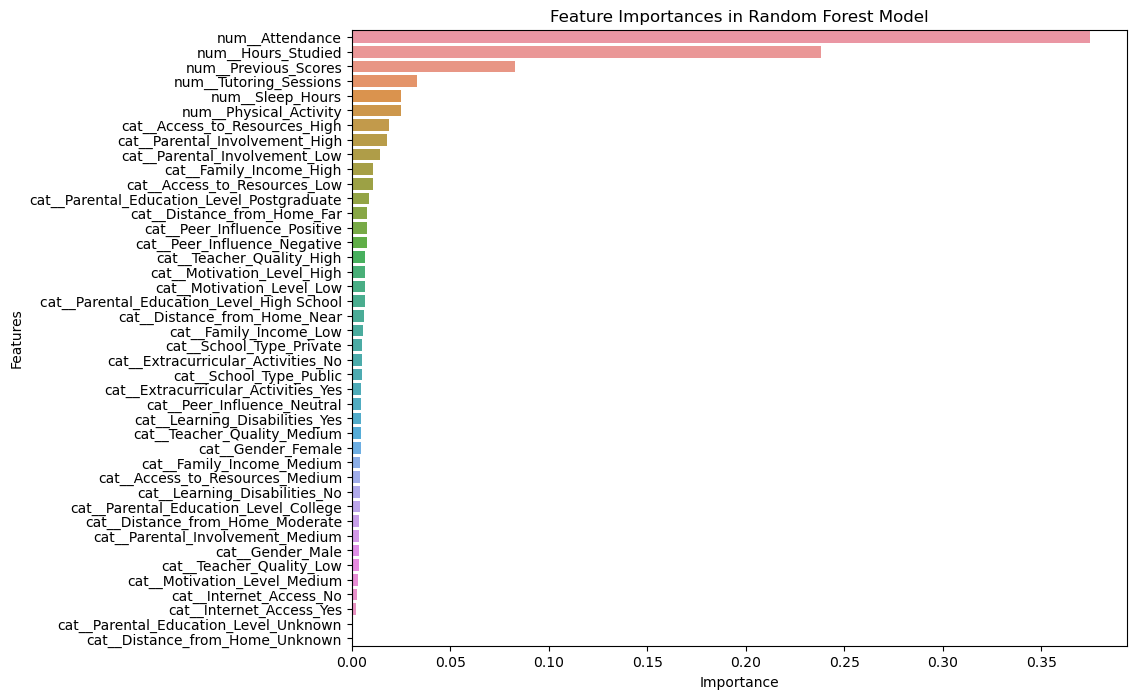

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Use all the variables for X and only Exam_Score for y
X = dataset.drop('Exam_Score', axis=1)
y = dataset['Exam_Score']

# Identify categorical and numerical variables
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# This will help process numerical variables
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# This will help process categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# This transorms different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Splits the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Makes the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculates statistics to evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Determine the most important features from this random forest model
importances = model.named_steps['regressor'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Create a dataframe for features and their importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot these features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()



## I will add to this later.

Based on the random forest model...

The most important variables in this model were Attendance, Hours_Studied, Previous_Scores, Tutoring Sessions, and Physical Activity. These top five variables were all numerical.

This random forest model compares to the decision trees in the following ways

*   Comparison 1 . . . 
*   Comparison 2 . . .



## Decision Tree 1 (Selina):

First, we will convert Exam_Score into a binary target variable because our goal is to classify scores as "High" or "Low." This transformation allows us to set up a clear classification problem, making it suitable for our decision tree models. By using the median of Exam_Score as the threshold, we can create a balanced target, ensuring that our classification models have an equal chance of predicting each category.

In [ ]:
threshold = dataset['Exam_Score'].median()
dataset['Exam_Score_Category'] = np.where(dataset['Exam_Score'] >= threshold, 'High', 'Low')

print(dataset[['Exam_Score', 'Exam_Score_Category']].head())

   Exam_Score Exam_Score_Category
0          67                High
1          61                 Low
2          74                High
3          71                High
4          70                High


Next, we will define the features and target for the first Decision Tree model. We’ll start with study habit-related features (Hours_Studied, Attendance, Previous_Scores) because our earlier analysis and the Random Forest model indicated that these variables play a significant role in influencing exam scores. Using these features in our first Decision Tree will allow us to examine how study behaviors impact Exam_Score_Category.

In [ ]:
# Define the features and target for the first Decision Tree
X_tree1 = dataset[['Hours_Studied', 'Attendance', 'Previous_Scores']]
y = dataset['Exam_Score_Category']

We will then split the data into training and testing sets. This split is essential because it allows us to train the model on one portion of the data and evaluate its performance on unseen data, which helps ensure that the model generalizes well and prevents overfitting.

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X_tree1, y, test_size=0.2, random_state=42)


Following that, we will build and train the first Decision Tree model on the training data. Training the model with this feature set will enable us to capture how study-related variables influence the classification of exam scores.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train1, y_train)

DecisionTreeClassifier(random_state=42)

After training, we will make predictions on the test data and evaluate the model. We’ll use accuracy, precision, recall, and tree depth as our evaluation metrics to understand how well the model performs and whether the study habit-related features provide good predictive power

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred1 = tree1.predict(X_test1)

print("Decision Tree Model 1 Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1, pos_label='High'))
print("Recall:", recall_score(y_test, y_pred1, pos_label='High'))
print("Tree Depth:", tree1.get_depth())


Decision Tree Model 1 Performance:
Accuracy: 0.800302571860817
Precision: 0.8209150326797385
Recall: 0.8317880794701987
Tree Depth: 21


Our results from Decision Tree 1 show that:

The model achieves 80% accuracy, indicating it correctly classifies exam scores as "High" or "Low" 80% of the time. This level of accuracy suggests the model is relatively effective but has room for improvement.

With a precision of 82% for predicting "High" scores, the model is fairly reliable when it identifies a score as "High." This means that out of all the times it predicts "High," 82% of those predictions are correct. High precision minimizes false positives, so we can trust the model’s "High" predictions reasonably well.

The recall of 83% for "High" scores suggests the model captures most actual "High" scores in the data, missing only a few. High recall here indicates the model is good at recognizing "High" scores, which is useful if we want to catch as many "High" scores as possible.

The tree depth of 21 is relatively deep, which means the model has a lot of decision splits. While this may help the model learn patterns in the training data, it also suggests a risk of overfitting, meaning the model could perform worse on new, unseen data.


These results indicate that Decision Tree 1 is fairly effective in distinguishing between "High" and "Low" exam scores, especially in identifying true "High" scores (high recall). However, the deep tree structure may have made the model too tailored to the training data, which could reduce its performance on new data.

## Decision Tree model 2

Now we will move on to Decision Tree Model 2. In this model, we’ll switch the features to focus on external factors – specifically Teacher_Quality, Parental_Involvement, and Family_Income. These features allow us to explore how factors outside of the student’s study habits might influence their exam performance. By comparing Decision Tree Model 2 with Model 1, we can see which feature set provides better predictions for Exam_Score_Category.

In [ ]:
X_tree2 = dataset[['Teacher_Quality', 'Parental_Involvement', 'Family_Income']]
y = dataset['Exam_Score_Category']  # Target remains the same as in Tree 1

Next, we’ll split the data into training and testing sets, keeping an 80-20 split for consistency with Decision Tree Model 1.

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train, y_test = train_test_split(X_tree2, y, test_size=0.2, random_state=42)

We’ll then initialize and train the second Decision Tree classifier with this new feature set. ## Haig Please expand here

This code builds a pipeline to encode categorical data with OneHotEncoder, trains a DecisionTreeClassifier, and then evaluates the model's accuracy, precision, recall, and tree depth.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_columns = X_train2.select_dtypes(include=['object']).columns

# preprocessing pipeline to OneHotEncode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Keep other columns as is
)

# preprocessor and the DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train2, y_train_encoded)

y_pred2 = pipeline.predict(X_test2)

print("\nDecision Tree Model 2 Performance (External Factors):")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred2))

high_label = label_encoder.transform(['High'])[0]
print("Precision:", precision_score(y_test_encoded, y_pred2, pos_label=high_label))
print("Recall:", recall_score(y_test_encoded, y_pred2, pos_label=high_label))
print("Tree Depth:", pipeline.named_steps['classifier'].get_depth())



Decision Tree Model 2 Performance (External Factors):
Accuracy: 0.5642965204236006
Precision: 0.5971769815418024
Recall: 0.7284768211920529
Tree Depth: 6


The peroformance of the DT is not great. Will do some hyperparameter tuning to find the optimal settings for the model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_columns = X_train2.select_dtypes(include=['object']).columns

# preprocessing pipeline to OneHotEncode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# pipeline with the preprocessor and the DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# hyperparameter tuning
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5  # 5-fold cross-validation
)

grid_search.fit(X_train2, y_train_encoded)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test2)

print("\nOptimized Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_best))
print("Precision:", precision_score(y_test_encoded, y_pred_best, pos_label=high_label))
print("Recall:", recall_score(y_test_encoded, y_pred_best, pos_label=high_label))
print("Tree Depth:", best_model.named_steps['classifier'].get_depth())

Best Parameters: {'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Optimized Decision Tree Model Performance:
Accuracy: 0.5642965204236006
Precision: 0.5971769815418024
Recall: 0.7284768211920529
Tree Depth: 5


The performance after the hyperparameter tunning didn't really improve the performance of the DT model so maybe DT is not the right approach here.

Our analysis shows that a single Decision Tree struggled to capture the data's complexity, with modest accuracy, precision, and recall scores that didn’t improve significantly even after tuning. However, the Random Forest model, an ensemble of multiple decision trees, performed far better, achieving 80% accuracy with stronger precision and recall. This highlights the advantage of using ensemble methods like Random Forest over a single decision tree, as they effectively capture complex relationships in data and deliver more accurate predictions.